In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [2]:
tf.__version__

'2.10.1'

Data Type

In [5]:
scalar = tf.constant(7)

scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [6]:
vector = tf.constant([5,2])

vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 2])>

In [7]:
MATRIX = tf.constant([[5,2],
                     [6,9]])

MATRIX

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 2],
       [6, 9]])>

In [3]:
tensor = tf.constant([[[5.2,2.1],
                     [6.,9.],
                     [3.,8.]]])

tensor

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[5.2, 2.1],
        [6. , 9. ],
        [3. , 8. ]]], dtype=float32)>

In [12]:
float_64_tensor = tf.constant([[[5.2,2.1],
                     [6.,9.],
                     [3.,8.]]],
                             dtype = tf.float64)

float_64_tensor

<tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[5.2, 2.1],
        [6. , 9. ],
        [3. , 8. ]]])>

In [13]:
tensor.ndim

3

In [14]:
vector.ndim

1

In [15]:
MATRIX.ndim

2

# VARIABLE --> NEW COMPARED TO TORCH

In [16]:
changeable_tensor = tf.Variable([10,7])

changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>

In [17]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [19]:
tensor[0].assign(7)

tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [21]:
random_1 = tf.random.Generator.from_seed(69)
random_1 = random_1.normal(shape=(3,2))

random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.29164317,  1.4531525 ],
       [-0.8223833 , -1.3446565 ],
       [-0.7183838 , -0.20373917]], dtype=float32)>

# Attributes DIFFERENT THAN TORCH

- Shape: length (number of elements)

- Rank (ndim): Number of dimension, Scalar rank 0, vector rank 1, matrix rank 2, tensor rank N

- Axis or dimension: a specific dimension of a tensor

- Size: total number of items in tensor

In [24]:
tensor

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[5.2, 2.1],
        [6. , 9. ],
        [3. , 8. ]]], dtype=float32)>

In [25]:
print ("Shape: ", tensor.shape)
print ("Rank: ", tensor.ndim)
print ("Axis: ", tensor[0,:,1])
print ("Size: ", tf.size(tensor))

Shape:  (1, 3, 2)
Rank:  3
Axis:  tf.Tensor([2.1 9.  8. ], shape=(3,), dtype=float32)
Size:  tf.Tensor(6, shape=(), dtype=int32)


In [28]:
tensor[0][:][1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6., 9.], dtype=float32)>

In [29]:
extra_dimension_tensor = tensor[..., tf.newaxis]

extra_dimension_tensor

<tf.Tensor: shape=(1, 3, 2, 1), dtype=float32, numpy=
array([[[[5.2],
         [2.1]],

        [[6. ],
         [9. ]],

        [[3. ],
         [8. ]]]], dtype=float32)>

In [30]:
print ("Rank: ", extra_dimension_tensor.ndim)

Rank:  4


In [31]:
tf.expand_dims(tensor, axis = -1)

<tf.Tensor: shape=(1, 3, 2, 1), dtype=float32, numpy=
array([[[[5.2],
         [2.1]],

        [[6. ],
         [9. ]],

        [[3. ],
         [8. ]]]], dtype=float32)>

In [32]:
tf.expand_dims(tensor, axis = 0)

<tf.Tensor: shape=(1, 1, 3, 2), dtype=float32, numpy=
array([[[[5.2, 2.1],
         [6. , 9. ],
         [3. , 8. ]]]], dtype=float32)>

# Operation

In [33]:
tensor * float_64_tensor

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:Mul]

In [39]:
tf.matmul(tensor,float_64_tensor)

InvalidArgumentError: cannot compute BatchMatMulV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:BatchMatMulV2]

In [43]:
tensor * tf.cast(float_64_tensor, dtype = float)

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[27.039997 ,  4.4099994],
        [36.       , 81.       ],
        [ 9.       , 64.       ]]], dtype=float32)>

In [44]:
tf.matmul(MATRIX, MATRIX)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[37, 28],
       [84, 93]])>

In [47]:
matrix2 = tf.constant([[3,5],
                     [1,6],
                      [9,8]])

matrix2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 5],
       [1, 6],
       [9, 8]])>

In [50]:
tf.reshape(matrix2, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 5, 1],
       [6, 9, 8]])>

In [49]:
tf.matmul(MATRIX, tf.reshape(matrix2, shape=(2,3)))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 27,  43,  21],
       [ 72, 111,  78]])>

In [54]:
tf.reduce_min(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=2.1>

In [55]:
tf.reduce_mean(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=5.5499997>

In [56]:
tf.reduce_mean(float_64_tensor)

<tf.Tensor: shape=(), dtype=float64, numpy=5.55>

In [57]:
tf.reduce_mean(matrix2)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

!!!!!!!!!!  AS SEEN ABOVE, reduce_mean can take many types other than FLOAT32 LIKES TORCH !!!!!!!!!!!!!!

HOWEVER, for <b> math.reduce_std or math.reduce_variance </b>, it requires FLOAT32 !!!!!!!!!!!!!!!!!!!!

In [4]:
tensor

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[5.2, 2.1],
        [6. , 9. ],
        [3. , 8. ]]], dtype=float32)>

In [5]:
tf.math.reduce_variance(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=6.1058335>

In [7]:
tf.argmax(tensor)

<tf.Tensor: shape=(3, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 0],
       [0, 0]], dtype=int64)>

In [8]:
tf.argmax(tensor, axis = 1)

<tf.Tensor: shape=(1, 2), dtype=int64, numpy=array([[1, 1]], dtype=int64)>

In [9]:
tf.argmax(tensor, axis = 2)

<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[0, 1, 1]], dtype=int64)>

In [15]:
tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

# One hot encoding

In [69]:
some_list = [0,1,2,3]

tf.one_hot(some_list, depth = 4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [72]:
tf.one_hot(some_list, depth = 4, on_value="I love deep learning", off_value="I also love to eat")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'I love deep learning', b'I also love to eat',
        b'I also love to eat', b'I also love to eat'],
       [b'I also love to eat', b'I love deep learning',
        b'I also love to eat', b'I also love to eat'],
       [b'I also love to eat', b'I also love to eat',
        b'I love deep learning', b'I also love to eat'],
       [b'I also love to eat', b'I also love to eat',
        b'I also love to eat', b'I love deep learning']], dtype=object)>

# Neral network

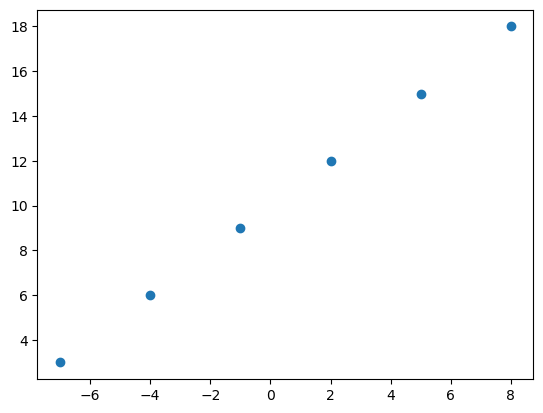

In [115]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

plt.scatter(X,y)

In [76]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom"," bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b' bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [116]:
X_tensor = tf.constant(X, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

X_tensor, y_tensor

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

***** Note: Sequential model default expect 2D array !!!!!!!!!! *****

In [117]:
# Model
# First way
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,))
])

# Compile with loss function and optimizer
model_0.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae", "accuracy"])

# Fit/Train
model_0.fit(X_tensor, y_tensor, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 190ms/step - loss: 11.2353 - mae: 11.2353 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1506 - mae: 11.1506 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.0658 - mae: 11.0658 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9811 - mae: 10.9811 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.8964 - mae: 10.8964 - accuracy: 0.0000e+00


In [156]:
# Second way
model_1 = tf.keras.Sequential()

# Layer 1
model_1.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu'))
model_1.add(tf.keras.layers.Dropout(0.3))
# Layer 2
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dropout(0.3))
# Layer 3
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dropout(0.3))

# Output layer
model_1.add(tf.keras.layers.Dense(1)) # activation='softmax' IF CLASSIFICATION, regression is fine

# Compile the model
model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['mae', 'accuracy'])

# Train the model
model_1.fit(X_tensor, y_tensor, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 351ms/step - loss: 10.5607 - mae: 10.5607 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 7.8724 - mae: 7.8724 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 5.8206 - mae: 5.8206 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 4.0442 - mae: 4.0442 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 5.7150 - mae: 5.7150 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 6.6553 - mae: 6.6553 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 5.6646 - mae: 5.6646 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 4.3962 - mae: 4.3962 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 2.9116 - mae:

In [121]:
model_0.predict([10.0])

1/1 [==============================] - 0s 26ms/step


array([[-4.674516]], dtype=float32)

In [157]:
model_1.predict([10.0])

1/1 [==============================] - 0s 70ms/step


array([[22.18395]], dtype=float32)

In [160]:
X_new = tf.range(-100, 100, 3)
y_new = X_new + 10

X_new, y_new

(<tf.Tensor: shape=(67,), dtype=int32, numpy=
 array([-100,  -97,  -94,  -91,  -88,  -85,  -82,  -79,  -76,  -73,  -70,
         -67,  -64,  -61,  -58,  -55,  -52,  -49,  -46,  -43,  -40,  -37,
         -34,  -31,  -28,  -25,  -22,  -19,  -16,  -13,  -10,   -7,   -4,
          -1,    2,    5,    8,   11,   14,   17,   20,   23,   26,   29,
          32,   35,   38,   41,   44,   47,   50,   53,   56,   59,   62,
          65,   68,   71,   74,   77,   80,   83,   86,   89,   92,   95,
          98])>,
 <tf.Tensor: shape=(67,), dtype=int32, numpy=
 array([-90, -87, -84, -81, -78, -75, -72, -69, -66, -63, -60, -57, -54,
        -51, -48, -45, -42, -39, -36, -33, -30, -27, -24, -21, -18, -15,
        -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,  15,  18,  21,  24,
         27,  30,  33,  36,  39,  42,  45,  48,  51,  54,  57,  60,  63,
         66,  69,  72,  75,  78,  81,  84,  87,  90,  93,  96,  99, 102,
        105, 108])>)

3/3 [==============================] - 0s 1ms/step


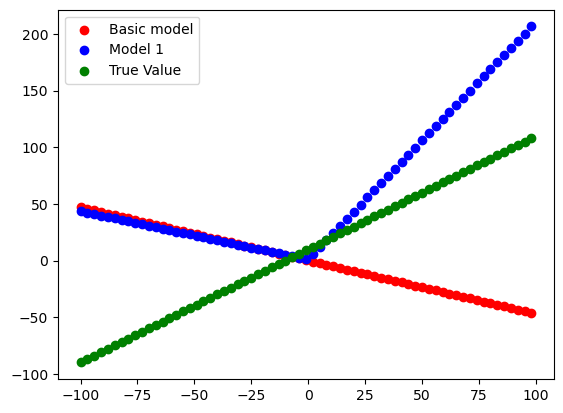

In [169]:
y_0_preds = model_0.predict(X_new)
y_1_preds = model_1.predict(X_new)

plt.scatter(X_new, y_0_preds, color='red', label='Basic model')
plt.scatter(X_new, y_1_preds, color='blue', label='Model 1')
plt.scatter(X_new, y_new, color="green", label='True Value')
plt.legend()

- Blue: The activation is relu --> squeeze X values less than 0

*** It is very off because we have too few data for Neural network to be useful here ***

In [167]:
from sklearn.model_selection import train_test_split

train_portion = int(0.7 * len(X_new))
# CONVERT TO NUMPY ARRAY
X_train, X_test, y_train, y_test = train_test_split(X_new.numpy(), y_new.numpy(), train_size = train_portion, random_state = 69)

X_train, y_train

(array([-46, -43,  29, -70, -13, -61,  89,  20, -19,  71, -55,  98,  95,
        -85, -82, -37, -58,  86,  35, -31,  53, -22,  41,  44,   5, -94,
         80,  17, -52, -91, -67,  56,  26,  11, -64, -28,  -4,  14,  -1,
         68, -73, -34,  47, -40,  65,  62]),
 array([-36, -33,  39, -60,  -3, -51,  99,  30,  -9,  81, -45, 108, 105,
        -75, -72, -27, -48,  96,  45, -21,  63, -12,  51,  54,  15, -84,
         90,  27, -42, -81, -57,  66,  36,  21, -54, -18,   6,  24,   9,
         78, -63, -24,  57, -30,  75,  72]))

In [178]:
model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Dense(100, input_shape = (1,), activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.2))

model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.2))

model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['mae'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


*** Non-trainable params is basically locked/learnt params to freeze ***

In [179]:
model_2.fit(X_train, y_train)

y_2_preds = model_2.predict(X_test)
y_2_preds

1/1 [==============================] - 0s 40ms/step


array([[-14.584834 ],
       [ 26.629812 ],
       [ 76.29279  ],
       [-79.591705 ],
       [-22.710691 ],
       [  6.7646194],
       [ 61.393898 ],
       [-71.46584  ],
       [ 41.528706 ],
       [-87.71755  ],
       [ 31.59611  ],
       [ 68.843346 ],
       [-90.426186 ],
       [ 48.978153 ],
       [-68.757225 ],
       [ -6.4587507],
       [ 63.87705  ],
       [  1.7990767],
       [-44.379646 ],
       [ -9.167596 ],
       [ 19.180365 ]], dtype=float32)

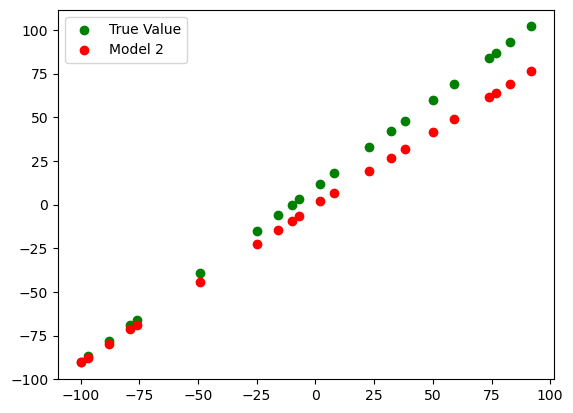

In [180]:
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.scatter(X_test, y_2_preds, color='red', label='Model 2')
plt.legend()

3/3 [==============================] - 0s 2ms/step


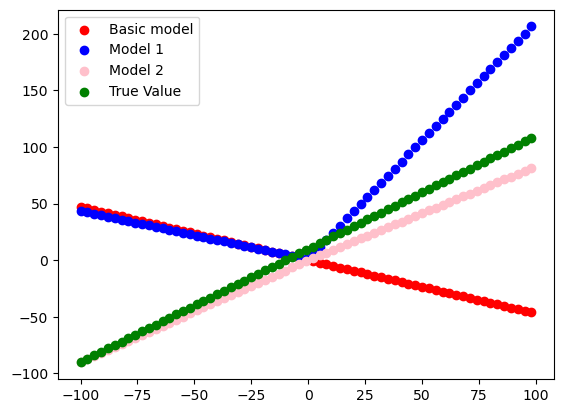

In [181]:
y_2_all_preds = model_2.predict(X_new)

plt.scatter(X_new, y_0_preds, color='red', label='Basic model')
plt.scatter(X_new, y_1_preds, color='blue', label='Model 1')
plt.scatter(X_new, y_2_all_preds, color='pink', label='Model 2')
plt.scatter(X_new, y_new, color="green", label='True Value')
plt.legend()